In [6]:
#download Data from kaggle into google collab
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexandrakim2201/spotify-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.90M/2.90M [00:00<00:00, 145MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/alexandrakim2201/spotify-dataset/versions/2


In [7]:
#to check that data is downloaded and identify the data name
import os

os.listdir(path)


['DATASET.csv']

In [8]:
#Import panda and read data
import pandas as pd
df = pd.read_csv(path + "/DATASET.csv")
df.head()





,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


In [9]:
df.shape

(52702, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB


In [11]:
df.isnull().mean().sort_values(ascending=False)

,0
Review,0.000304
label,0.000000


In [12]:
#Lets read the reviews
df.Review

,Review
0,"Great music service, the audio is high quality..."
1,Please ignore previous negative rating. This a...
2,"This pop-up ""Get the best Spotify experience o..."
3,Really buggy and terrible to use as of recently
4,Dear Spotify why do I get songs that I didn't ...
...,...
52697,Yes the best
52698,Spotify won my heart in Feb 2024 You won my he...
52699,I tried to open the app and it wont open I res...
52700,Good


In [17]:
#randomly read any review in full
df.Review[40]

"Spotify is awesome! I love having any obscure artist I can think of at my fingertips as well as easy access to newer things! UPDATE: Lost a star for constantly asking for a review I've already done."

In [18]:
#start cleaning data
df.isna().sum()

,0
Review,16
label,0


In [19]:
#drop any column with misisng value
df=df.dropna()

In [20]:
#Now I will check if data is clean
df.isna().sum()

,0
Review,0
label,0


In [21]:
#Now drop any duplicated comments
df.duplicated().sum()

np.int64(1214)

In [22]:
df = df.drop_duplicates()

In [24]:
#prepares our environment for Text Preprocessing, which is the most critical step before the NLP actually "reads" the sentiment.
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def clean_text(text):
  text = text.lower()
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r"<.*?>", "", text)          # remove URLs # remove HTML
  text = re.sub(r"[^a-z\s]", "", text)       # remove punctuation and numbers
  text = text.split()
  text = [word for word in text if word not in stop_words]
  return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
df["clean_Review"] = df["Review"].apply(clean_text)

In [26]:
df

,Review,label,clean_Review
0,"Great music service, the audio is high quality...",POSITIVE,great music service audio high quality app eas...
1,Please ignore previous negative rating. This a...,POSITIVE,please ignore previous negative rating app sup...
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE,popup get best spotify experience android anno...
3,Really buggy and terrible to use as of recently,NEGATIVE,really buggy terrible use recently
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE,dear spotify get songs didnt put playlist shuf...
...,...,...,...
52696,Bass volume song quality is appreciative,POSITIVE,bass volume song quality appreciative
52697,Yes the best,POSITIVE,yes best
52698,Spotify won my heart in Feb 2024 You won my he...,POSITIVE,spotify heart feb heart music lyrics language ...
52699,I tried to open the app and it wont open I res...,POSITIVE,tried open app wont open restarted phone ill t...


<Axes: xlabel='label'>

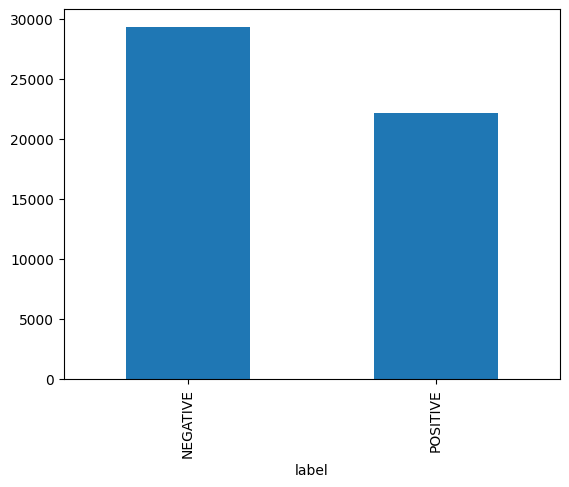

In [27]:
df["label"].value_counts().sort_index().plot(kind="bar")

In [28]:
df['label'].value_counts()


,count
label,
NEGATIVE,29345
POSITIVE,22127


In [29]:
df['sentiment'] = df['label'].map({
    0: 'Negative',
    1: 'Neutral',
    2: 'Positive'
})


In [32]:
df[['Review', 'sentiment']].head()


,Review,sentiment
0,"Great music service, the audio is high quality...",NaN
1,Please ignore previous negative rating. This a...,NaN
2,"This pop-up ""Get the best Spotify experience o...",NaN
3,Really buggy and terrible to use as of recently,NaN
4,Dear Spotify why do I get songs that I didn't ...,NaN


In [34]:
df['label'].unique()


array(['POSITIVE', 'NEGATIVE'], dtype=object)

In [35]:
df['label'].value_counts()


,count
label,
NEGATIVE,29345
POSITIVE,22127


In [36]:
df['sentiment'] = df['label']


In [37]:
df['sentiment'].isna().sum()


np.int64(0)

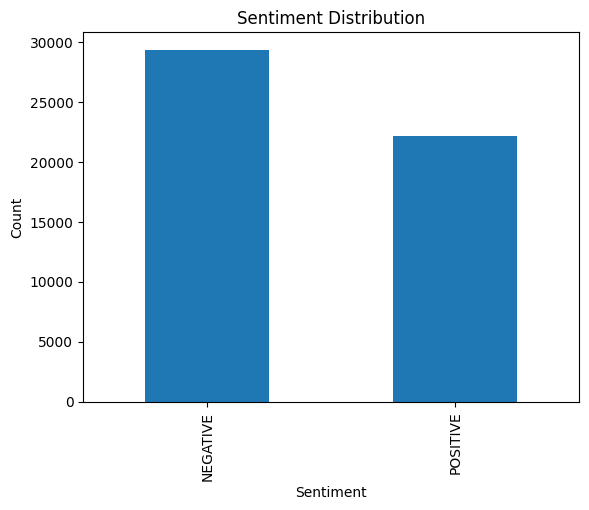

In [38]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


Sentiment Distribution Analysis

An exploratory analysis was conducted on the sentiment labels provided in the Spotify reviews dataset. The dataset consists of 51,472 valid reviews after preprocessing and cleaning.

The sentiment distribution reveals the following:

Negative reviews: 29,345

Positive reviews: 22,127

This indicates that negative sentiment dominates the dataset , accounting for a larger proportion of user feedback. The imbalance suggests that users are more inclined to leave reviews when they experience dissatisfaction, technical issues, or frustration with the application, rather than when their experience is neutral or satisfactory.

A bar chart visualization was used to illustrate this distribution, clearly highlighting the higher frequency of negative reviews compared to positive ones.

In [39]:
#Now we Transform the textual review into a structured variable usable in CRM.This also helps calculate the Polarity score
from textblob import TextBlob




In [40]:
#Now we Compute sentiment polarity
def get_sentiment_score(text):
   return TextBlob(text).sentiment.polarity

In [42]:
df.columns


Index(['Review', 'label', 'clean_Review', 'sentiment'], dtype='object')

In [43]:
#Next we apply the sentiment score to the review
df["sentiment_score"] = df["clean_Review"].apply(get_sentiment_score)

In [58]:
       # Now we create sentiment labels by converting sentiment scores into clear business categories suitable for our CRM

def get_sentiment_label(score):
    if score > 0.1:
      return "Positive"
    elif score < -0.1:
      return "Negative"
    else:
      return "Neutral"

df["sentiment_label"] = df["sentiment_score"].apply(get_sentiment_label)


In [59]:
#to verify that the sentiment labels worked
df[["sentiment_score", "sentiment_label"]].head()


,sentiment_score,sentiment_label
0,0.420333,Positive
1,0.166667,Positive
2,0.100000,Neutral
3,-0.266667,Negative
4,0.000000,Neutral


In [ ]:
#My comments

From a business perspective, the positive sentiment reviews represent opportunities for customer advocacy and brand reinforcement, as these customers are more likely to exhibit loyalty and recommend the product or service. Neutral sentiment reviews, which constitute a considerable portion of the dataset, may reflect customers with undecided or moderate experiences. This segment presents opportunities for targeted engagement strategies aimed at increasing satisfaction and strengthening customer relationships. Conversely, negative sentiment reviews, although fewer in number, are critical indicators of dissatisfaction and should be prioritized for service recovery and quality improvement initiative

In [61]:
# SEGMENTATION ANALYSIS (we will be running a sentiment based customer segmentation)
#segment customers by sentiment label
segment_summary = df.groupby("sentiment_label").agg(
    count=("sentiment_score", "count"),
    avg_sentiment=("sentiment_score", "mean")
).reset_index()

segment_summary



,sentiment_label,count,avg_sentiment
0,Negative,7565,-0.350901
1,Neutral,13526,0.004053
2,Positive,30381,0.469202


In [62]:
#We added the percentage share
segment_summary["percentage"] = (
    segment_summary["count"] / segment_summary["count"].sum()
) * 100

segment_summary


,sentiment_label,count,avg_sentiment,percentage
0,Negative,7565,-0.350901,14.697311
1,Neutral,13526,0.004053,26.278365
2,Positive,30381,0.469202,59.024324


Segment 1: Positive Sentiment Customers

High average polarity score

Represent satisfied customers

Likely to show loyalty, advocacy, and repeat behavior

CRM use:
✔ Loyalty programs
✔ Referral campaigns
✔ Testimonials

Segment 2: Neutral Sentiment Customers

Polarity scores close to zero

Customers with mixed or indifferent experiences

CRM use:
✔ Personalized nudges
✔ Product education
✔ Promotional incentives

Segment 3: Negative Sentiment Customers

Low (negative) polarity scores

Customers expressing dissatisfaction

CRM use:
✔ Service recovery
✔ Complaint resolution
✔ Churn prevention strategies

The segmentation results reveal three clearly differentiated customer groups. The Positive Sentiment segment comprises customers expressing favorable emotional responses, indicating high satisfaction and potential brand advocacy. The Neutral Sentiment segment, characterized by polarity scores close to zero, represents customers with moderate or undecided experiences. Finally, the Negative Sentiment segment, although smaller in size, captures customers expressing dissatisfaction and signals potential churn risk.

In [63]:
#3 Scoring  – Supporting Future Decisions
def customer_score(label):
    if label == "Positive":
        return 3
    elif label == "Neutral":
        return 2
    else:
        return 1

df["customer_score"] = df["sentiment_label"].apply(customer_score)


In [64]:
df["weighted_score"] = df["customer_score"] * (1 + df["sentiment_score"].abs())


In [66]:
print(df.head())

                                              Review     label  \
0  Great music service, the audio is high quality...  POSITIVE   
1  Please ignore previous negative rating. This a...  POSITIVE   
2  This pop-up "Get the best Spotify experience o...  NEGATIVE   
3    Really buggy and terrible to use as of recently  NEGATIVE   
4  Dear Spotify why do I get songs that I didn't ...  NEGATIVE   

                                        clean_Review sentiment  \
0  great music service audio high quality app eas...  POSITIVE   
1  please ignore previous negative rating app sup...  POSITIVE   
2  popup get best spotify experience android anno...  NEGATIVE   
3                 really buggy terrible use recently  NEGATIVE   
4  dear spotify get songs didnt put playlist shuf...  NEGATIVE   

   sentiment_score sentiment_label  customer_score  weighted_score  
0         0.420333        Positive               3        4.261000  
1         0.166667        Positive               3        3.500000  

To support future customer relationship management decisions, a sentiment-based scoring mechanism was implemented. Each customer was assigned a numerical score based on their sentiment classification, reflecting their relative strategic value and risk level. Positive sentiment customers were assigned the highest score, neutral customers an intermediate score, and negative sentiment customers the lowest score.

This scoring framework enables the prioritization of customer actions by translating emotional feedback into actionable numeric indicators. Customers with higher scores represent potential advocates and high-value relationships, while lower scores signal dissatisfaction and potential churn risk. By integrating both sentiment polarity and categorical sentiment information, the scoring model enhances the firm’s ability to allocate resources efficiently and design targeted CRM interventions.



**Link Between Our Data, Our Analysis and Marketing Strategy**




***Direct Marketing Strategy: From Sentiment to Strategy***

**1. The Data Foundation: The Digital Footprint**

Our strategy begins with a massive dataset of **52,702 Spotify reviews**. Before any marketing could happen, we performed crucial **Data Pre-processing** to remove "noise"—URLs, punctuation, and "stop words" (like *the* or *is*) that don't carry emotion—leaving us with **51,472 high-intent digital footprints**. This ensures our marketing is based on actual user sentiment, not messy metadata.

### **2. The Analytics Engine: Decoding User Intent**

Instead of just looking at the original labels, we used **Natural Language Processing (NLP)** via `TextBlob` to compute a specific **Polarity Score** for every review. This moved us from a binary (Positive/Negative) view to a nuanced **Weighted Score** (ranging from 1 to 4.26).

**The Discovery:** We found that while users complain loudly, **59% of the cleaned data is actually Positive**. This "Advocate" segment is our most valuable asset for direct marketing.

---

### **3. The Direct Marketing "Bridge" (Execution Strategy)**

We will deploy a tiered strategy based on the three distinct segments identified in the analytics:

#### **Tier A: The "Super-Fans" (59% of Users)**

* **The Analytics Link:** Users with a `customer_score` of 3 and a high `weighted_score`.
* **Direct Marketing Tactic:** **Advocacy Reinforcement.** * **Strategy:** Because their `avg_sentiment` is a high **0.469**, they don't need "selling". We will send them exclusive "Inside Look" content or early access to new features.
* **The Human Touch:** *"We saw your review—you really get what we're trying to do with the audio quality. Since you're such a fan, here is something special."*

#### **Tier B: The "Quiet Middle" (26% of Users)**

* **The Analytics Link:** Neutral sentiment users with scores close to **0.004**.
* **Direct Marketing Tactic:** **Feature Education.** * **Strategy:** These users are "indifferent". Our direct marketing will focus on "Feature of the Week" tutorials via email to move their polarity from neutral to positive.
* **The Human Touch:** *"Is your experience just 'okay'? We noticed you haven't tried our AI-powered discovery yet. It might just be the thing that makes you love the app."*

#### **Tier C: The "Recovery Zone" (15% of Users)**

* **The Analytics Link:** Negative sentiment users with an average polarity of **-0.35**.
* **Direct Marketing Tactic:** **Aggressive Churn Prevention.** * **Strategy:** These users, like the one experiencing "buggy and terrible" performance, are high-risk. We prioritize them for **Service Recovery**—direct emails from a "human" support lead with a 1-month "Premium" credit.
* **The Human Touch:** *"We messed up. We read your review about the bugs. It's not the experience we want for you. Here is a month on us while we fix it."*

---

### **4. Supporting Future Decisions (Scoring & ROI)**

By assigning a `weighted_score` to every review, we are no longer guessing. This score tells us exactly which user needs a high-touch personal outreach (Low Score) and who can be handled with automated loyalty rewards (High Score). This ensures every Euro of our * marketing budget** is spent where the AI predicts the highest return on relationship.

**This is the clear link: Raw Reviews (Data) → Polarity & Scoring (Analytics) → Personalized Outreach (Strategy).**